In [1]:
import numpy as np
import pandas as pd
import sys

sys.path.append(r'C:\Users\tamaghna\Documents\pCloud Sync\Python\Projects\Ipython')

from Simulation import *

%matplotlib inline
import matplotlib.pyplot as plt

(array([  15.,   39.,  117.,  179.,  193.,  185.,  118.,   88.,   52.,   14.]),
 array([-5.46336702, -4.70599614, -3.94862526, -3.19125439, -2.43388351,
        -1.67651263, -0.91914175, -0.16177087,  0.5956    ,  1.35297088,
         2.11034176]),
 <a list of 10 Patch objects>)

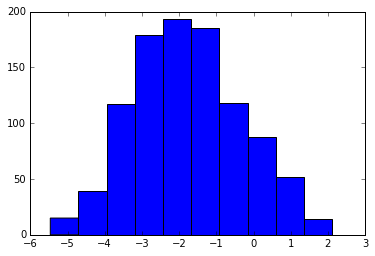

In [112]:
def calculate_algo_loss(T, n, B, eta):
    expert_loss = -B + 2*B*np.random.rand(T,n)
    scaler = 1 - eta*expert_loss
    weights = np.multiply.accumulate(scaler)
    weights = weights / np.sum(weights, axis=1)[:, None]
    loss_algo = np.sum(weights*expert_loss,axis=1)
    cumm_expert = np.cumsum(expert_loss, axis=0)
    cumm_algo = np.cumsum(loss_algo)
    terminal_loss_experts = min(cumm_expert[-1,:])
    terminal_loss_algo = cumm_algo[-1]
    return terminal_loss_algo - terminal_loss_experts

excess_loss=[]
for i in range(1000):
    excess_loss.append(calculate_algo_loss(100, 5, 1, 0.5))
plt.hist(excess_loss)

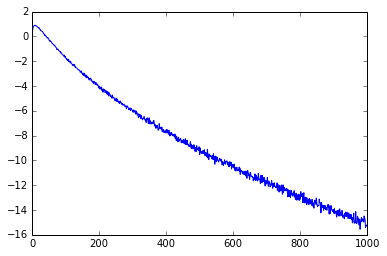

In [115]:
mean = []
for t in range(1, 1000):
    excess_loss=[]
    for i in range(1000):
        excess_loss.append(calculate_algo_loss(t, 5, 1, 0.5))
    mean.append(np.mean(excess_loss))

plt.plot(range(1, 1000), mean)

In [2]:
T = 1000
H = 0.5

s1 = fBM_Levinson(m=T, H=H, cumm=0)
s2 = fBM_Levinson(m=T, H=H, cumm=0)
s3 = fBM_Levinson(m=T, H=H, cumm=0)
s4 = fBM_Levinson(m=T, H=H, cumm=0)
s5 = fBM_Levinson(m=T, H=H, cumm=0)

s = np.array([s1, s2,s3,s4,s5]).transpose()
s_ts = pd.DataFrame(s)
s = np.sign(s_ts)

In [ ]:
eta = 0.5
base_weights = np.array([0.2]*5)
port_weights = [np.array([0.2]*5)]

cum_pnl = 0
max_w = -9999
curr_dd = 0

weights = [base_weight]
for i in range(1, len(s_ts)):
    scaler = 1 + eta * np.array(s.iloc[i])
    w = weights[-1] * scaler
    ww = w / np.sum(w)
    
    ret = np.array(r.iloc[-1])
    pr = np.sum(port_weights[-1] * ret)
    cum_pnl += pr
    
    max_w = max([cum_pnl, max_w])
    curr_dd = max_w - cum_pnl
    
    if max(ww)>0.8:
        switching_prob = np.exp(-150*dd)
        ww_dash = switching_prob * ww + (1-switching_prob)*base_weight
        port_weights.append(ww_dash)
        weights.append(w)
    elif max(ww)<0.25:
        
        

In [262]:
eta=0.5
scaler = 1 + eta*s
weights = scaler.cumprod()
weights1 = weights.div(np.sum(weights, axis=1), axis=0)
avg_weight = weights.expanding(min_periods=2).mean()

dd = np.maximum.accumulate(np.array(s_ts.cumsum()), axis=0) - np.array(s_ts.cumsum())
dd_df = pd.DataFrame(dd)
dd_port = weights1.multiply(dd_df, axis=0).sum(axis=1)
switching_prob = np.exp(-150*dd_port)

w = np.array(weights1)
x = np.zeros_like(w)
x[:,:] = 0.2
w = pd.DataFrame(x)

weights = weights1.multiply(switching_prob, axis=0) + w.multiply((1-switching_prob), axis=0)
# weights = 0.8*weights + 0.2*avg_weight

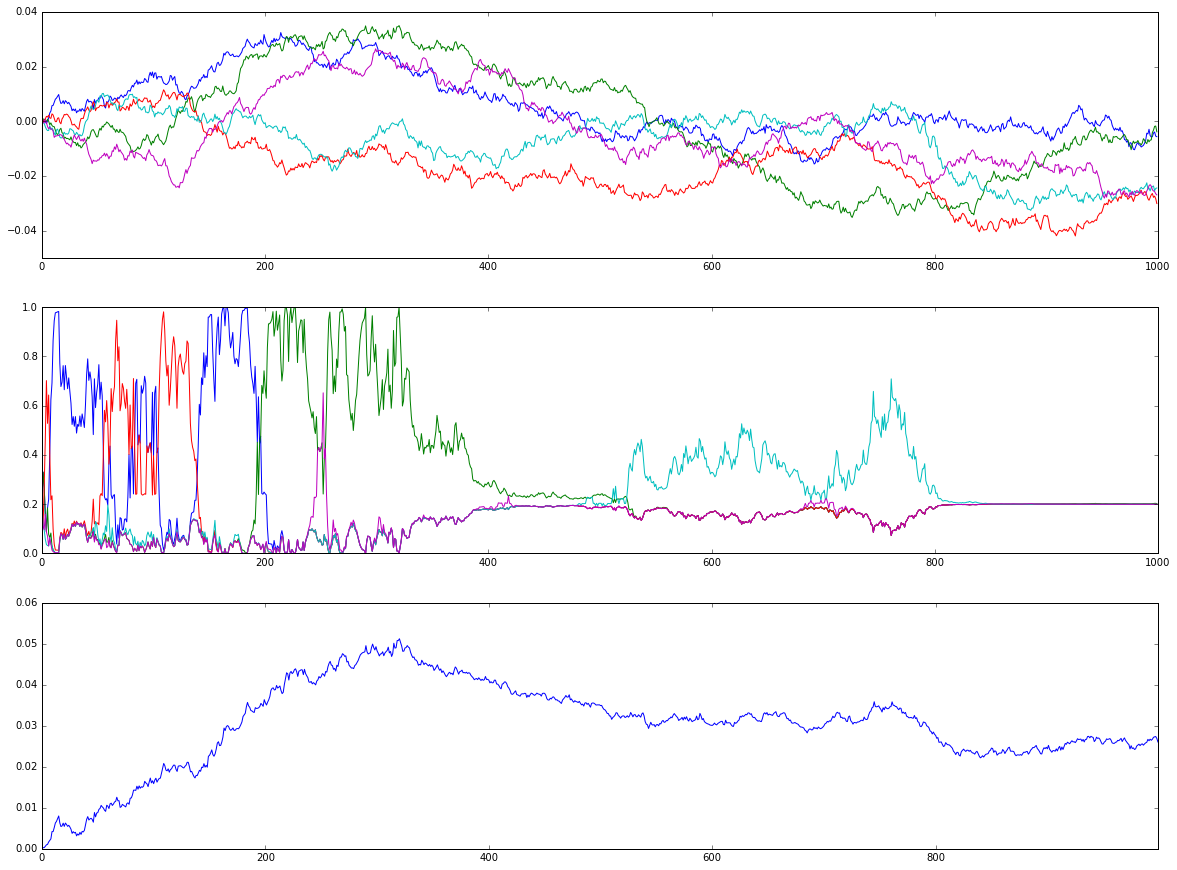

In [263]:
plt.figure(figsize=(20,15))

plt.subplot(311)
plt.plot(s_ts.cumsum())
# plt.ylim(s_ts.min(), s_ts.max())

plt.subplot(312)
plt.plot(weights)
plt.ylim(0,1)

plt.subplot(313)
s_ts.multiply(weights, axis=0).sum(axis=1).cumsum().plot()